Codebook Data-story on cocaine in waste water

This data story is about the amount of cocaine found in the waste water of several European cities. 

The first dataset "df" is about the year 2020. I decided later to add more data from the years 2011-2020
to allow for a comparison over time. 

Firstly, we are importing the needed modules into the codebook: 

In [1]:
# Importing modules 
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Now, we are reading the data into the codebook. In this case it is the Dataset about the amount of cocaine found in the ground water of European cities in 2020. By spelling out the name of the created dataframe, we are displaying it. 

In [2]:
# Read and display CSV file 
df = pd.read_csv('WW-data-cocaine-2020.csv') 
df

,SiteID,country,city,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
0,site1,AT,Graz,98.22,107.09,138.97,277.65,141.82,113.55,90.27,98.53,168.00,138.22
1,site2,AT,Hall-Wattens,198.51,191.85,188.40,252.67,258.04,184.96,197.85,196.07,221.02,210.32
2,site3,AT,Innsbruck,272.40,285.70,352.42,403.34,392.42,266.43,271.96,276.69,353.65,320.67
3,site4,AT,Kapfenberg,148.49,157.88,118.73,204.25,190.41,102.76,102.67,136.35,154.04,146.46
4,site6,AT,Kufstein,364.86,369.03,440.21,449.37,499.04,357.81,347.98,360.62,436.61,404.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,site130,SI,Maribor,114.96,128.11,148.12,175.68,165.55,115.90,129.46,124.18,151.31,139.68
87,site131,SI,Novo mesto,85.13,99.88,103.75,143.97,146.71,91.86,80.81,88.61,121.57,107.44
88,site132,SI,Velenje,124.17,112.96,167.66,161.06,182.05,141.43,147.62,128.25,163.05,148.13
89,site135,TR,Adana,5.09,4.89,5.57,3.16,5.28,4.92,5.30,5.09,4.73,4.89


In the next steps, we are displaying the defined columns and dropping the ones not needed. 

In [3]:
#Define columns

df.keys()

Index(['SiteID', 'country', 'city', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Weekday mean',
       'Weekend mean', 'Daily mean'],
      dtype='object')

In [4]:
#remove columns 

df=df.drop(['SiteID','Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday'],1)

Now, we are going to sort the values of a column and display the 10 values with the highest value. This way we get a list of the Top 10 Cities in which cocaine remains were found in the waste water.

In [5]:
#Order rows by values of a column (high to low).
df=df.sort_values("Daily mean", ascending=False)
df.head(10)

,country,city,Weekday mean,Weekend mean,Daily mean
9,BE,Antwerp Zuid,1005.70,1301.75,1174.88
15,CH,Zurich,738.76,976.06,874.36
69,NL,Amsterdam,708.56,813.70,768.64
14,CH,St. Gallen Hofen,625.08,758.57,691.83
32,ES,Santiago,543.01,661.60,610.78
12,CH,Berne,536.68,590.06,567.18
70,NL,Eindhoven,445.40,581.11,522.95
61,HR,Zagreb,431.32,569.44,510.24
13,CH,Geneva,496.31,505.38,501.50
71,NL,Utrecht,423.42,546.29,493.63


By naming the data frame "dfhead", we can then easily plot the values into a simple bar chart.

<AxesSubplot:xlabel='city'>

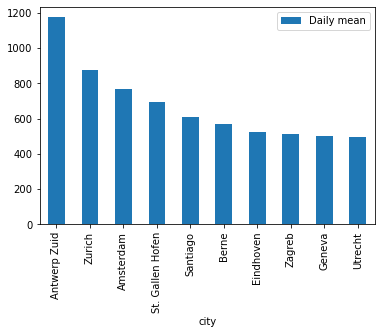

In [6]:
dfhead = df.head(10)
dfhead.plot.bar(x='city',y='Daily mean')

<AxesSubplot:xlabel='city', ylabel='Daily mean'>

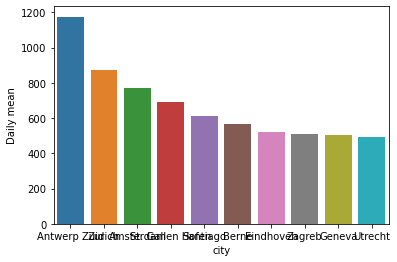

In [7]:
#Do a prettier plot with seaborn (@me)

sns.barplot(data=dfhead, x="city", y="Daily mean")

From the list and the bar chart we can see that Amsterdam is in the Top 3. By displaying only the Amsterdam column, we can see all the columns for this row. From the data, we can conclude that more cocaine remains are found on the weekend than during the week.  

In [8]:
#Display column needed 

df[df['city']=='Amsterdam']

,country,city,Weekday mean,Weekend mean,Daily mean
69,NL,Amsterdam,708.56,813.7,768.64


If we want to find out what the daily mean sum of all cocaine remains found in the analyzed cities is, we can do it like this: 

In [9]:
#Sum values of one whole column. -> in this case overall Cocaine found in the water of all these cities 
df['Daily mean'].sum()

17136.57

To look at which country has the highest Daily mean, we can group our df by country and show the mean. Then, we can sort the values from highest to lowest and display these. 

Note: Possibly not all countries had the same amount of waste water analyzed/ the same amount of locations tested. Therefore, the data should be interpreted with care. 

In [10]:
#Group by country
df.groupby(by="country").mean()

# Define group
Group = df.groupby(by="country").mean()

# Order countries by daily mean (high to low)
Group=Group.sort_values("Daily mean", ascending=False)

# Display Top 10 countries 
Group.head(10)

,Weekday mean,Weekend mean,Daily mean
country,,,
BE,646.996667,720.066667,688.753333
CH,599.207500,707.517500,658.717500
NL,525.793333,647.033333,595.073333
ES,491.600000,548.895000,524.340000
HR,431.320000,569.440000,510.240000
FR,416.870000,405.850000,410.580000
IT,321.575000,399.315000,367.270000
PT,315.553333,305.130000,309.596667
IS,231.540000,322.030000,283.250000


<AxesSubplot:xlabel='country'>

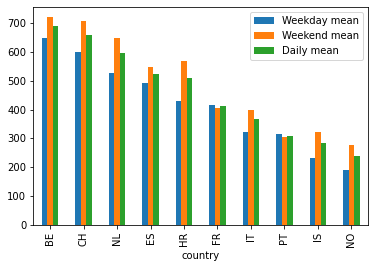

In [11]:
#Visualize results 

GroupCountries2020 = Group.head(10)

GroupCountries2020.plot.bar()

#But we won't put this in the story as its not very representative. 
#as there are differences in how much data was collected in each country 

By analyizing the dataset we now now which countries and cities show the biggest remains of cocaine in analyzed waste water.

But it would be interesting to see how these trends have developed over time. Therefore we download, import and merge data sets from the years 2011-2019 to the 2020 data set. Additionally, we add a column for the "year" to allow for comparison over time. (Notice that not all cities were analyzed at all points in time)

In [12]:
#Defining years and naming the new data frame "dfs"
years = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
dfs = []


#Only add columns 'country and city' and columns that include the word 'mean'
cols = ['country','city']+[c for c in df.columns if 'mean' in c]

#Filling dfs by reading in the CSV files and only including the wanted columns 
for year in years:
    frame = pd.read_csv(f'WW-data-cocaine-{year}.csv')
    frame = frame[cols]
    frame['year']= year
    
    #Merging the dataframe 
    dfs.append(frame)
    
#Define names for additional data sets (Here I am reading in the dataframes a second time to name them)
data2019 = pd.read_csv('WW-data-cocaine-2019.csv')
data2018 = pd.read_csv('WW-data-cocaine-2018.csv')
data2017 = pd.read_csv('WW-data-cocaine-2017.csv')
data2016 = pd.read_csv('WW-data-cocaine-2016.csv')
data2015 = pd.read_csv('WW-data-cocaine-2015.csv')
data2014 = pd.read_csv('WW-data-cocaine-2014.csv')
data2013 = pd.read_csv('WW-data-cocaine-2013.csv')
data2012 = pd.read_csv('WW-data-cocaine-2012.csv')
data2011 = pd.read_csv('WW-data-cocaine-2011.csv') 

In [13]:
#Adding the "df" dataset to the other ones

#add column year for the 2020 Dataset 
df['year'] = '2020'

#Add one more element 2020 
dfs.append(df)

#Merge all datasets together to one dataframe with the same columns
df_all=pd.concat(dfs)

#Allocate the value year to a date/time instead of object
df_all['year'] = pd.to_datetime(df_all['year'])

In [14]:
#Display df_all types 

df_all.dtypes

country                 object
city                    object
Weekday mean           float64
Weekend mean           float64
Daily mean             float64
year            datetime64[ns]
dtype: object

Now, we have created a new overall dataframe "df_all" which includes all the data from 2011-2020 and has an additional year column. We can display it by simply spelling it out.

In [15]:
df_all

,country,city,Weekday mean,Weekend mean,Daily mean,year
0,BE,Antwerp Zuid,610.56,804.15,721.18,2011-01-01
1,BE,Brussels,150.15,209.95,184.32,2011-01-01
2,CZ,Budweis,7.19,6.53,6.82,2011-01-01
3,ES,Barcelona,331.80,489.10,421.68,2011-01-01
4,ES,Castellon,368.74,373.70,371.57,2011-01-01
...,...,...,...,...,...,...
45,FI,Lappeenranta,1.73,1.26,1.47,2020-01-01
51,FI,Rauma,1.09,1.04,1.06,2020-01-01
38,FI,Kajaani,1.36,0.60,0.93,2020-01-01
40,FI,Kokkola,0.85,0.68,0.75,2020-01-01


In [16]:
##What does this do? 

dfs[0]

,country,city,Weekday mean,Weekend mean,Daily mean,year
0,BE,Antwerp Zuid,610.56,804.15,721.18,2011
1,BE,Brussels,150.15,209.95,184.32,2011
2,CZ,Budweis,7.19,6.53,6.82,2011
3,ES,Barcelona,331.80,489.10,421.68,2011
4,ES,Castellon,368.74,373.70,371.57,2011
5,ES,Santiago,149.82,272.62,211.22,2011
6,FR,Paris Seine Centre,189.12,219.18,206.30,2011
7,GB,London,361.20,424.22,392.71,2011
8,HR,Zagreb,42.57,55.48,49.95,2011
9,IT,Milan,221.98,251.50,238.85,2011


Let's make our dataframe look a bit nicer by renaming the columns. 

In [17]:
#Rename the columns of a DataFrame
df_all=df_all.rename(columns = {'country':'Country','city':'City','year':'Year'})

df_all

,Country,City,Weekday mean,Weekend mean,Daily mean,Year
0,BE,Antwerp Zuid,610.56,804.15,721.18,2011-01-01
1,BE,Brussels,150.15,209.95,184.32,2011-01-01
2,CZ,Budweis,7.19,6.53,6.82,2011-01-01
3,ES,Barcelona,331.80,489.10,421.68,2011-01-01
4,ES,Castellon,368.74,373.70,371.57,2011-01-01
...,...,...,...,...,...,...
45,FI,Lappeenranta,1.73,1.26,1.47,2020-01-01
51,FI,Rauma,1.09,1.04,1.06,2020-01-01
38,FI,Kajaani,1.36,0.60,0.93,2020-01-01
40,FI,Kokkola,0.85,0.68,0.75,2020-01-01


In [18]:
#Getting an overview of the data frame 
#for our analysis not as relevant (but maybe for future analysis) as it includes data over mulitple years but
#technically: this is how many remains of cocaine were found in the waste water over all the years in all the analyzed cities
df_all.describe()

,Weekday mean,Weekend mean,Daily mean
count,537.000000,537.000000,537.000000
mean,198.803166,253.007989,229.567877
std,209.531601,260.721502,237.056896
min,0.000000,0.000000,0.000000
25%,27.100000,38.940000,33.290000
50%,128.250000,173.980000,156.620000
75%,328.070000,405.850000,371.570000
max,1252.960000,1301.750000,1275.660000


If we want to see whether Amsterdam was in the Top cities of other years we can simply sort and display the respective data sets. 

In [19]:
#Order and display the Top values for 2019 (and 2018, 2017 respectively). 
#This shows us that Amsterdam was in the Top 3 in 2019 and 2018 but not in 2017.

data2019.sort_values("Daily mean", ascending=False)

#data2018.sort_values("Daily mean", ascending=False)

#data2017.sort_values("Daily mean", ascending=False)

,SiteID,country,city,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
8,site14,BE,Antwerp Zuid,786.96,1389.77,977.75,1138.32,2048.63,1006.05,1582.17,1252.96,1292.69,1275.66
54,site107,NL,Amsterdam,898.05,687.74,825.14,1039.35,1238.79,1007.32,1206.68,930.82,1027.65,986.15
16,site29,CH,St. Gallen Hofen,754.26,846.22,943.11,1222.28,1203.00,723.51,676.36,758.95,1022.98,909.82
17,site30,CH,Zurich,771.53,811.58,870.04,1059.27,1074.69,899.95,749.50,777.54,975.99,890.94
47,site99,IS,Reykjavik Klettagarðar,719.97,723.36,701.59,936.55,932.54,641.26,529.49,657.61,802.98,740.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,site95,GR,Eleusis,27.51,11.34,3.29,13.61,16.83,20.86,21.55,20.13,13.65,16.43
24,site39,DE,Chemnitz,5.73,11.38,14.43,25.79,20.08,12.34,3.09,6.73,18.16,13.26
39,site84,FI,Tampere,9.91,8.21,12.83,22.19,15.94,9.78,9.85,9.32,15.19,12.67
40,site85,FI,Turku,7.69,7.68,8.19,15.53,20.17,10.93,7.29,7.55,13.71,11.07


Now, let's look at the change we see over time of the cocaine remains found in Amsterdams waste water. 

In [20]:
#Only display the rows with the string 'Amsterdam' in the City column. 
df_all[df_all['City']=='Amsterdam']

#Define Amsterdam data frame 
dfAMS=df_all[df_all['City']=='Amsterdam']

#Sort year values & change in dataframe & display
dfAMS = dfAMS.sort_values("Year", ascending=True)

#display
dfAMS

,Country,City,Weekday mean,Weekend mean,Daily mean,Year
10,NL,Amsterdam,628.75,654.34,644.10,2011-01-01
18,NL,Amsterdam,589.82,695.99,650.49,2012-01-01
29,NL,Amsterdam,344.85,429.11,393.00,2013-01-01
41,NL,Amsterdam,651.88,764.75,716.38,2014-01-01
43,NL,Amsterdam,533.78,722.68,641.72,2015-01-01
50,NL,Amsterdam,642.78,802.49,734.04,2017-01-01
64,NL,Amsterdam,788.34,1040.37,932.36,2018-01-01
54,NL,Amsterdam,930.82,1027.65,986.15,2019-01-01
69,NL,Amsterdam,708.56,813.70,768.64,2020-01-01


Now we can create a line plot to see how the remains in waste water changed over time. 
(Attention: From the list we see that the value for 2016 is missing) 

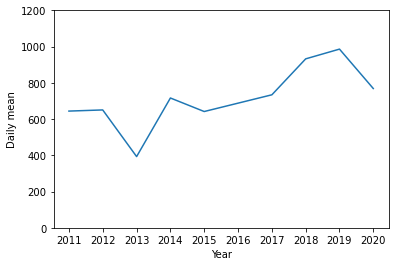

In [21]:
#Do a lineplot for cocaine in waster water in Amsterdam over the last decade 
sns.lineplot(x='Year', y='Daily mean', data=dfAMS)

#Start graph at 0 
plt.ylim(0,1200)

#Exclude the headline (0,100) at the top of the graph 
plt.show()

#Might be interesting for a data story to look why the value dropped in 2013 (could not find an explanation now)

In [22]:
dfNL=df_all[df_all['Country']=='NL']

In [23]:
dfNL=dfNL.sort_values("City", ascending=True)

In [24]:
dfNL

,Country,City,Weekday mean,Weekend mean,Daily mean,Year
10,NL,Amsterdam,628.75,654.34,644.10,2011-01-01
69,NL,Amsterdam,708.56,813.70,768.64,2020-01-01
18,NL,Amsterdam,589.82,695.99,650.49,2012-01-01
54,NL,Amsterdam,930.82,1027.65,986.15,2019-01-01
29,NL,Amsterdam,344.85,429.11,393.00,2013-01-01
64,NL,Amsterdam,788.34,1040.37,932.36,2018-01-01
41,NL,Amsterdam,651.88,764.75,716.38,2014-01-01
50,NL,Amsterdam,642.78,802.49,734.04,2017-01-01
43,NL,Amsterdam,533.78,722.68,641.72,2015-01-01
55,NL,Eindhoven,487.83,588.61,545.42,2019-01-01


In [25]:
#Before we can display this we need to change "Year" to a date/time type

#Display the types 
dfNL.dtypes

# Change Year to date/time object
dfNL['Year'] = pd.to_datetime(dfNL['Year'])

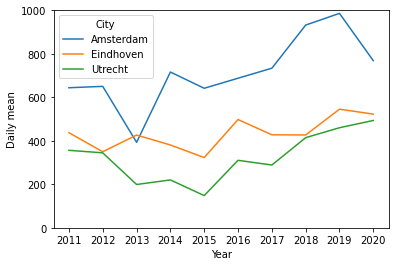

In [26]:
#Doing the line plot
sns.lineplot(x='Year', y='Daily mean', hue='City', data=dfNL[~dfNL['City'].isin(['Nieuwegein Ijssel.','Oudewater'])])

#Start graph at 0 
plt.ylim(0,1000)

#Exclude the headline (0,1000) at the top of the graph 
plt.show()

Now, if we want to see whether the overall cocaine remains in Europe increased over time we can look at the average mean over the years.

In [27]:
#We are importing the module numpy to allow for mathematical calculations such as mean creation
import numpy as np

In [28]:
#Group, define and display overall cocaine in ground water by years  

df_all_simple = df_all.groupby('Year').agg(np.mean)   

df_all_simple

,Weekday mean,Weekend mean,Daily mean
Year,,,
2011-01-01,254.202000,312.208667,286.512000
2012-01-01,210.213333,261.905417,239.672500
2013-01-01,180.104390,226.632439,206.993171
2014-01-01,178.250000,219.861739,202.652826
2015-01-01,165.957115,214.495769,193.717500
2016-01-01,180.042000,238.000909,212.579455
2017-01-01,242.108871,325.013065,288.613226
2018-01-01,186.219211,246.398816,220.510263
2019-01-01,256.626533,317.826800,291.531067


<AxesSubplot:xlabel='Year'>

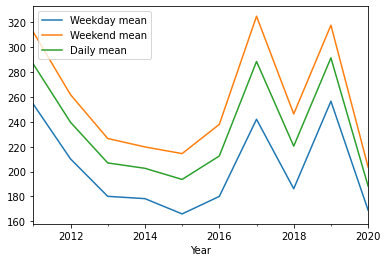

In [29]:
#Visualize overall cocaine in ground water by years  
#VLAD: How do I display all the years? 
#VLAD: How do I start the graph at 0? 
#Is there something wrong with the data? 
    

df_all_simple.plot()

<AxesSubplot:xlabel='Year', ylabel='Daily mean'>

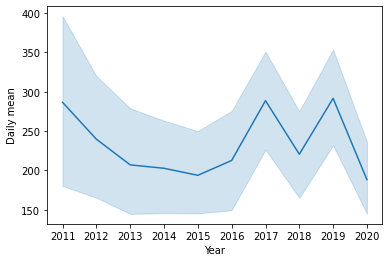

In [30]:
#Now, we do a prettier plot with seaborn
#Vlad: How to sort values? And plot overall cinsumption 

df_all.sort_values("Year", ascending=True)

sns.lineplot(x='Year', y='Daily mean', data=df_all) 

Let's take a look at the overall most comsuming cities over time. In regards to Amsterdam, we see that out of all the cities and out of all the values over 10 years, Amsterdam in 2019 ranks third. 

In [31]:
#Show which cities had the highest consumption in which years. 

df_all=df_all.sort_values("Daily mean", ascending=False)

df_all.head()

,Country,City,Weekday mean,Weekend mean,Daily mean,Year
8,BE,Antwerp Zuid,1252.96,1292.69,1275.66,2019-01-01
9,BE,Antwerp Zuid,1005.70,1301.75,1174.88,2020-01-01
54,NL,Amsterdam,930.82,1027.65,986.15,2019-01-01
56,GB,Bristol,743.20,1138.76,969.23,2018-01-01
31,ES,Barcelona,783.88,1101.17,965.19,2017-01-01


In [32]:
#Not all Needed anymore for this data analysis but included for future guidance

#If we only want to diplay the Top 10 Daily mean. 
Daily_Mean = df_all["Daily mean"]

#This is how we see the type of an object
type(df_all["Daily mean"])

#This is how we see the shape (How many daily means are in the dataframe?)
df_all["Daily mean"].shape

# Create DataFrame Object 
City_Mean = df_all[["City","Daily mean"]]

#Display Top 10 cities
City_Mean.head(10)


,City,Daily mean
8,Antwerp Zuid,1275.66
9,Antwerp Zuid,1174.88
54,Amsterdam,986.15
56,Bristol,969.23
31,Barcelona,965.19
12,Zurich,934.42
64,Amsterdam,932.36
2,Antwerp Zuid,914.79
16,St. Gallen Hofen,909.82
35,London,909.43


In [33]:
df_all_simple = df_all.groupby('City').agg(np.median) 

df_all_simple = df_all_simple.sort_values("Daily mean", ascending=False)

#This shows us that cities like for example London are also very high BUT not always included in the analysis

df_all_simple.head(10)

,Weekday mean,Weekend mean,Daily mean
City,,,
Antwerp Zuid,713.42,860.31,797.360
London,719.38,730.08,723.990
Zurich,610.15,806.81,722.530
Amsterdam,642.78,764.75,716.380
Barcelona,450.01,603.97,537.980
Geneva,416.97,505.38,484.700
Madrid VdlV,400.12,502.79,458.790
Koper,437.94,471.48,456.860
St. Gallen Hofen,417.43,507.93,450.320


We see that in all the cities the Weekend mean is on average higher than the weekday mean. We also see that London sneaked in there whereas it was not shown by results before. Lets have a look on how often Lonon is featured in the data frame.

In [34]:
df_all[df_all['City']=='London']

,Country,City,Weekday mean,Weekend mean,Daily mean,Year
35,GB,London,730.36,1043.74,909.43,2015-01-01
41,GB,London,790.53,999.31,894.92,2016-01-01
37,GB,London,708.40,759.03,737.33,2014-01-01
25,GB,London,799.35,644.13,710.65,2013-01-01
43,GB,London,509.08,701.13,618.82,2019-01-01
7,GB,London,361.20,424.22,392.71,2011-01-01


We see that London is featured quite frequently but not as frequent as Amsterdam. Especially the most recent dataset (2020) does not feature London.

<AxesSubplot:xlabel='Year', ylabel='Daily mean'>

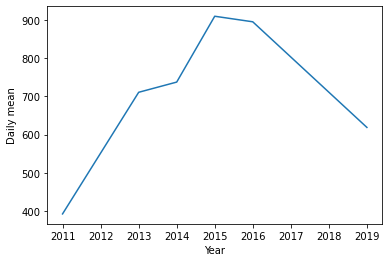

In [35]:
#Quickly check London over the years 

dfLON = df_all[df_all['City']=='London']
dfLON = dfLON.sort_values("Year", ascending=True)
sns.lineplot(x='Year', y='Daily mean', data=dfLON)

We see that London had a drop down in 2019. An interesting story might be to think about the reasons for it. (Maybe a new policy/ law for example or statistical reasons? But this would be for another data story. 

Getting back to our main story, let's export the dataframe to furhter visualize the data, create dashboards and do a map (this is also possible with geopandas in phyton but a lot more complicated)

In [36]:
#Export combinded df_all data frame as CSV to use in Tableau for further data visualisations
#df_all.to_csv(r'/Users/jilschuetze/Desktop/Data Journalism /Data Story/df_Tableau.csv', index = False)